# Rice Type Classication
Dataset : [Link](https://www.kaggle.com/datasets/mssmartypants/rice-type-classification/data)

Schema Data : [Link](https://philarchive.org/archive/SAARCU)

Problem : 

Dalam industri beras, terutama dalam proses klasifikasi beras jenis Jasmine (1) dan Gonen (0), terdapat kebutuhan untuk meningkatkan efisiensi dan akurasi dalam proses klasifikasi tersebut. Proses ini penting untuk memastikan bahwa beras yang dihasilkan dan didistribusikan sesuai dengan standar kualitas yang diinginkan oleh pelanggan dan pasar. Namun, terdapat tantangan dalam membedakan antara jenis beras Jasmine dan Gonen secara manual.

Oleh karena itu, objektif dalam program ini adalah untuk melakukan prediksi beras Jasmine (1) dari Thailand dan Gonen (0) dari Turki yang memiliki karakteristik unik, dengan menggunakan beberapa model terbaik dari 5 algoritma seperti :  K Nearest Neighbors (KNN), dan Support Vector Machine (SVM), Decision Tree,  Random Forest, dan salah satu algoritma boosting. Adapun penentuan model terbaik menggunakan metode Cross Validation, yang dilanjutkan dengan Hyperparameter Tuning untuk mengoptimalkan model.

Selanjutnya, keinginan atau kebutuhan dari program ini adalah memaksimal nilai akurasi dari prediksi beras Jasmine atau Gonen. Oleh karena itu, metric yang tepat untuk mengukur performa model adalah Accuracy.

# Import Libraries

Melakukan import library yang akan membantu proses pengerjaan program.

In [14]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, classification_report, ConfusionMatrixDisplay
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
import warnings
warnings.filterwarnings("ignore")

import pickle

# Data Loading

Program ini akan menggunakan `df` untuk diproses dan pada akhirnya siap menjadi input dalam proses Machine Learning

In [15]:
# Menyimpan data original
df_ori = pd.read_csv('riceClassification.csv')

# Membuat data copy ke df
df = df_ori.copy()

# Menampilkan 5 data teratas dan terbawah df
df

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


Menampilkan informasi dataset yang berhail dilakukan import

# Exploratory Data Analysis

In [16]:
# Menampilkan informasi data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18185 entries, 0 to 18184
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               18185 non-null  int64  
 1   Area             18185 non-null  int64  
 2   MajorAxisLength  18185 non-null  float64
 3   MinorAxisLength  18185 non-null  float64
 4   Eccentricity     18185 non-null  float64
 5   ConvexArea       18185 non-null  int64  
 6   EquivDiameter    18185 non-null  float64
 7   Extent           18185 non-null  float64
 8   Perimeter        18185 non-null  float64
 9   Roundness        18185 non-null  float64
 10  AspectRation     18185 non-null  float64
 11  Class            18185 non-null  int64  
dtypes: float64(8), int64(4)
memory usage: 1.7 MB


Insight mengenai informasi data:
- Terdapat 18185 baris dan 12 kolom
- Semua kolom bertipe numerik dan string, di mana terdapat kolom bertipe `float` berjumlah 8, dan 2 lainnya bertipe `integer`.

Feature Description [Sumber](https://philarchive.org/archive/SAARCU)

| Variable | Definition |
| --- | --- |
| Area | Mewakili luas total butir beras. Butir yang lebih besar mungkin milik jenis beras tertentu, sementara yang lebih kecil bisa menunjukkan jenis yang berbeda. Kepentingan atribut ini dalam klasifikasi tidak mengejutkan, mengingat korelasinya yang langsung dengan ukuran butir. |
| MajorAxisLength | 'MajorAxisLength' sesuai dengan panjang sumbu terpanjang dari butir beras. Ini adalah karakteristik geometris yang kritis, karena jenis beras yang berbeda sering menunjukkan pola pemanjangan yang berbeda. Fitur ini sangat penting dalam menangkap variasi yang terkait dengan bentuk butir beras.|
| MinorAxisLength | Sebagai pelengkap 'MajorAxisLength', 'MinorAxisLength' mewakili panjang sumbu terpendek dari butir beras. Inklusinya menyoroti pentingnya menangkap bentuk keseluruhan butir, termasuk aspek kebulatan dan simetri. |
| Eccentricity | Menggambarkan sejauh mana butir beras menyimpang dari lingkaran sempurna. Variasi dalam eksentrisitas dapat menjadi indikasi jenis beras tertentu dengan bentuk butir yang unik, seperti butir yang panjang atau elliptical. |
| ConvexArea | Menunjukkan luas poligon konveks terkecil yang dapat mengelilingi butir beras. Ini mencerminkan bentuk batas keseluruhan, memberikan wawasan tentang ketidakberaturan butir yang khas untuk jenis tertentu. |
| EquivDiameter | Mewakili diameter lingkaran dengan luas yang sama dengan butir beras. Ini merangkum informasi terkait ukuran, mirip dengan fitur 'Area', tetapi dari perspektif geometris yang berbeda. |
| Extent | Mengukur rasio antara luas butir beras dan luas kotak pembatasnya. Ini dapat membantu membedakan antara jenis beras dengan tingkat penyebaran butir yang bervariasi dalam kotak pembatasnya. |
| Perimeter | Mengukur panjang batas butir beras. Ini menangkap detail halus bentuk butir, termasuk variasi kontur dan tepi. |
| Roundness | Mencerminkan sejauh mana butir beras menyerupai lingkaran sempurna. Fitur ini merangkum informasi tentang bentuk butir dan keteraturannya, yang dapat menjadi indikasi jenis beras tertentu. |
| AspectRatio | Mengukur rasio 'MajorAxisLength' terhadap 'MinorAxisLength.' Ini memberikan wawasan tentang pemanjangan atau pelebaran butir beras, membantu dalam klasifikasi jenis butir yang pemanjang atau memipih. |


In [17]:
# Cek data duplikat
len(df[df.duplicated() == True])

0

Berdasarkan hasil pengecekan data duplikat, tidak terdapat data duplikat dalam dataset

In [18]:
# Menampilkan unik value di setiap kolom

df.nunique()

id                 18185
Area                5343
MajorAxisLength    18185
MinorAxisLength    18185
Eccentricity       18185
ConvexArea          5450
EquivDiameter       5343
Extent             18007
Perimeter          16246
Roundness          18184
AspectRation       18185
Class                  2
dtype: int64

Berdasarkan informasi data diatas, dapat diketahui bahwa seluruh kolom memiliki nilai unik yang banyak, kecuali class sebagai target. Oleh karena itu, seluruh kolom dapat dikatakan kolom numerik  

In [19]:
# Melakukan pengecekan missing value di setiap kolom dataset

df.isnull().sum()

id                 0
Area               0
MajorAxisLength    0
MinorAxisLength    0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Perimeter          0
Roundness          0
AspectRation       0
Class              0
dtype: int64

Berdasarkan informasi data diatas, dapat diketahui bahwa tidak terdapat missing value di dalam dataset.

In [20]:
df['Class'].value_counts()

Class
1    9985
0    8200
Name: count, dtype: int64

Berdasarkan informasi diatas dapat diketahui bahwa target yang akan diprediksi memiliki distribusi kelas yang cukup seimbang. 

In [21]:
# Membuat copy pada dataset untuk berfokus pada EDA

df_eda = df.copy()

df_eda

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation,Class
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796,1
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137,1
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950,1
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456,1
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000,1
...,...,...,...,...,...,...,...,...,...,...,...,...
18180,18181,5853,148.624571,51.029281,0.939210,6008,86.326537,0.498594,332.960,0.663444,2.912535,0
18181,18182,7585,169.593996,58.141659,0.939398,7806,98.272692,0.647461,385.506,0.641362,2.916910,0
18182,18183,6365,154.777085,52.908085,0.939760,6531,90.023162,0.561287,342.253,0.682832,2.925396,0
18183,18184,5960,151.397924,51.474600,0.940427,6189,87.112041,0.492399,343.371,0.635227,2.941216,0


Membuat data copy dataset agar tidak merubah data pada proses Feature Engineering dan berfokus kepada penampilkan grafik untuk mencari informasi. 

[]

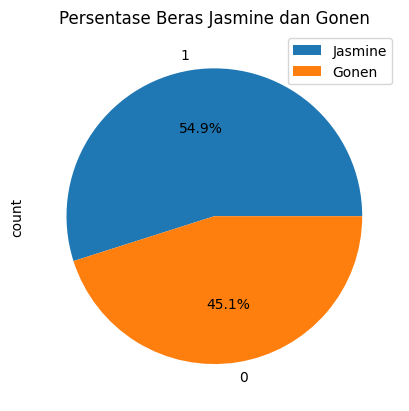

In [22]:
# Membuat grafik jumlah beras jasmine dan gonen

df_eda['Class'].value_counts().plot(kind='pie',autopct="%1.1f%%")
plt.title('Persentase Beras Jasmine dan Gonen')
plt.legend(labels=['Jasmine', 'Gonen'], loc='upper right')
plt.plot()

Berdasarkan visualisasi diatas dapat diketahui bahwa persentase Beras Jasmine sebesar 54.9 persen sedangkan persentase Beras Gonen sebesar 45.1 persen.

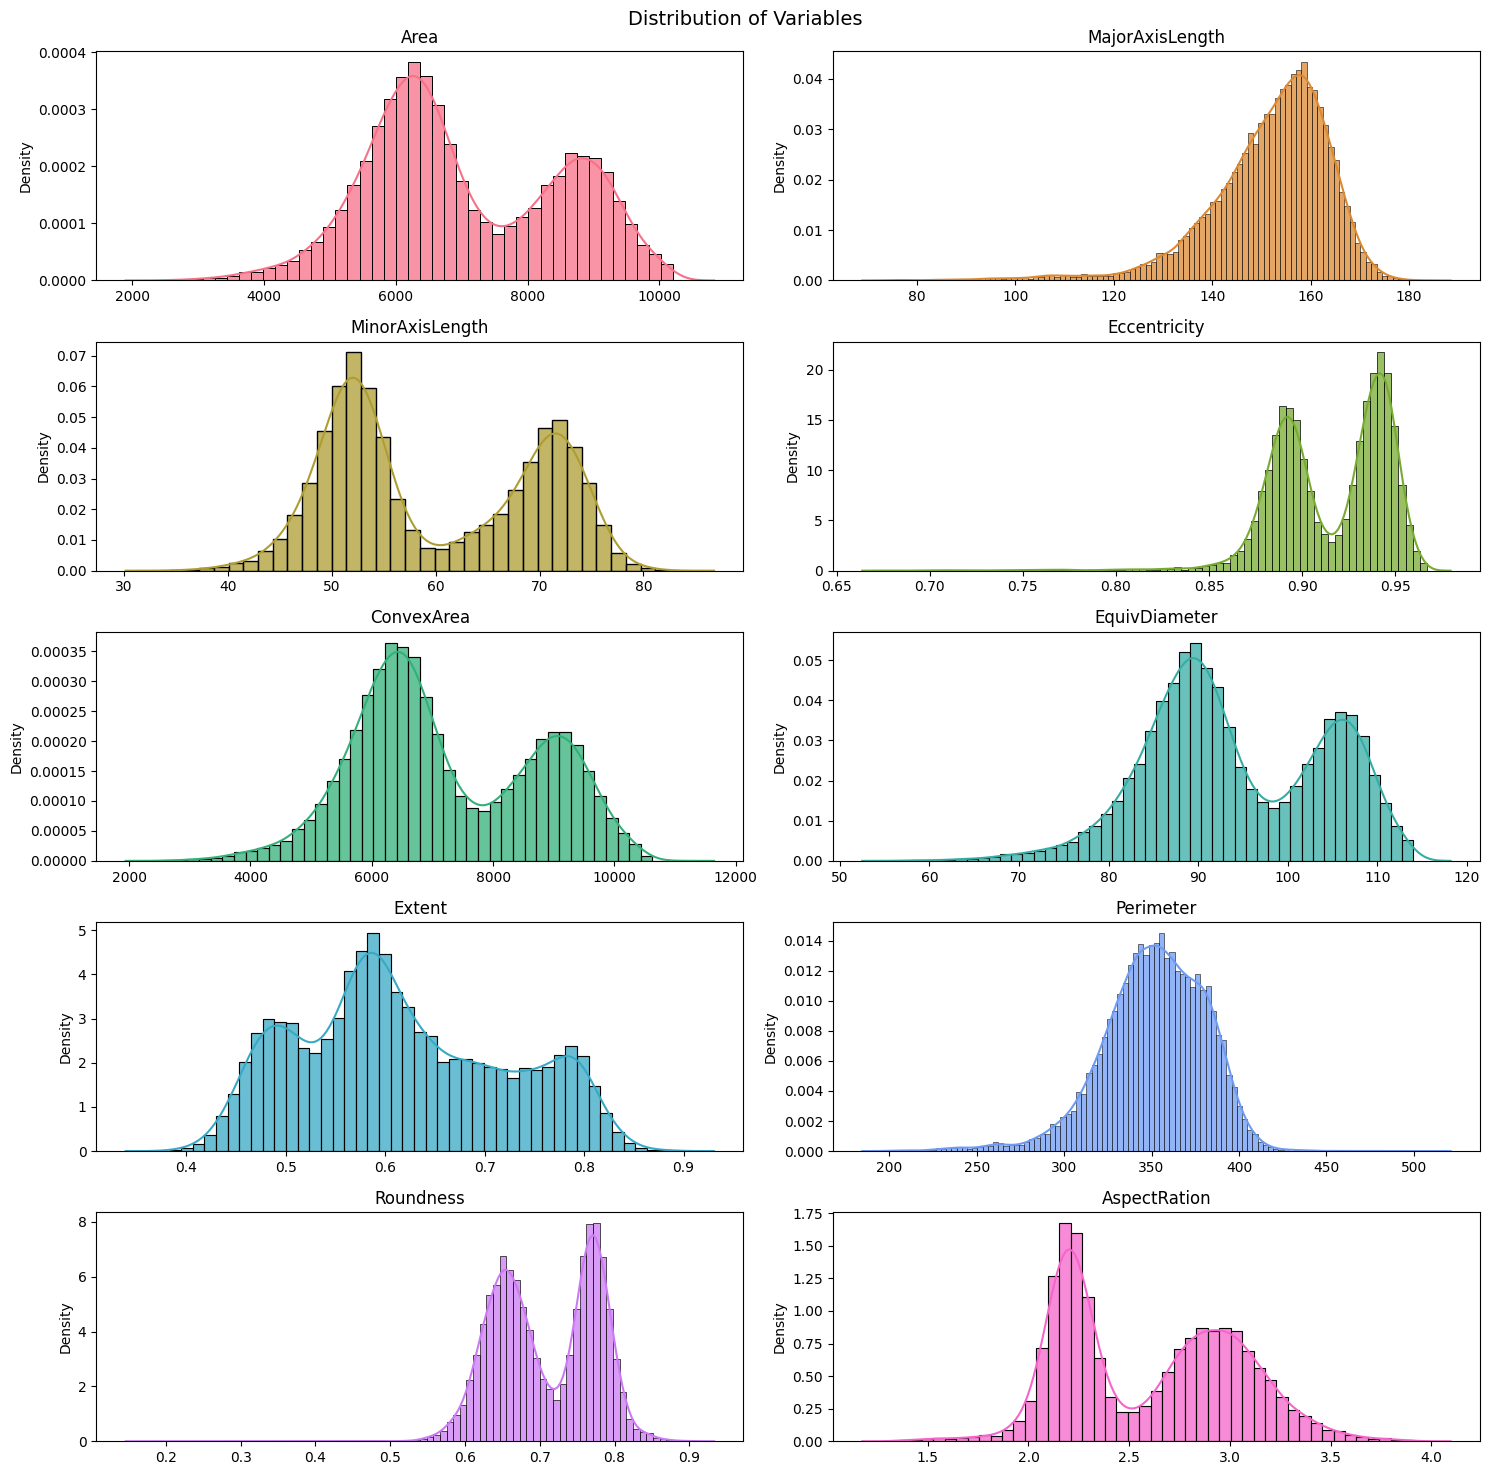

In [23]:
# Membuat distribusi menggunakan KDE dan histogram

df_eda1 = df_eda.drop('id', axis=1)

cols = df_eda1.columns[:-1]

# Membuat palet warna
colors = sns.color_palette('husl', len(cols)) 

# Membuat subplot dengan 5 baris dan 2 kolom dan menyatukan array 2D menjadi array 1D
fig, axs = plt.subplots(nrows=5, ncols=2, figsize=(15, 15))  
axs = axs.flatten() 

# Iterasi melalui setiap kolom untuk membuat plot KDE dan histogram
for i, col in enumerate(cols):
    sns.kdeplot(df_eda1[col], ax=axs[i], color=colors[i])  
    sns.histplot(df_eda1[col], ax=axs[i], color=colors[i], stat='density')  

    # Menghapus label x untuk menghindari redundansi
    axs[i].set_xlabel('')  
    axs[i].set_title(col)
    plt.tight_layout()

# Membuat judul 
fig.suptitle("Distribution of Variables", fontsize=14)
fig.tight_layout()

Berdasarkan visualisasi diatas dapat diketahui hanya kolom MajorAxisLength dan Perimeter yang terdistribusi normal. Kemudian pada kolom Area, MinorAxisLength, Eccentricity, Convex Area, EquivDiamater, Roundness, dan AspectRation yang memiliki 2 peak di dalam distribusi datanya, sehingga dapat dikatakan terdapat 2 modus data, walaupun tidak sama jumlahnya, di dalam kolom-kolom tersebut. Terakhir pada kolom Extent diketahui bahwa terdapat 3 peak di dalam distribusinya sehingga terdapat 3 modus di kolom Extent, walaupun besarannya tidak sama. 

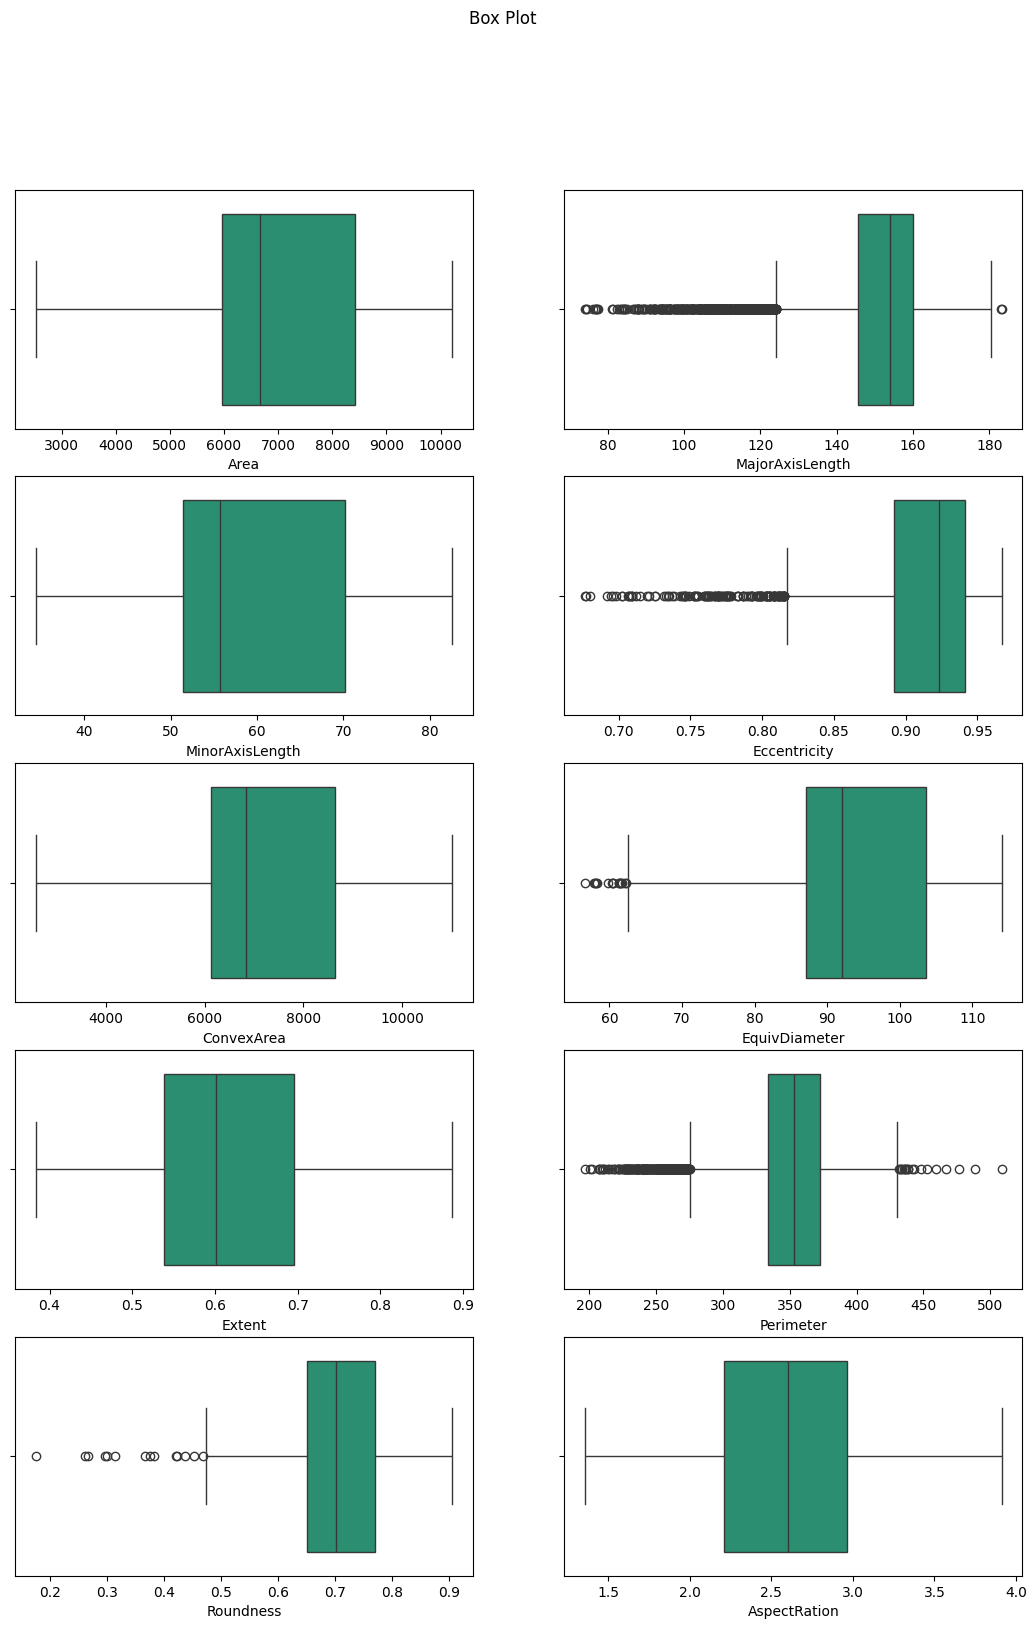

In [24]:
# Melakukan boxplot untuk seluruh kolom
fig, axes = plt.subplots(5,2, figsize=(13,18))
fig.suptitle('Box Plot')
k = 0
for i in range(0,5):
    for j in range(0,2):
        sns.boxplot(ax=axes[i,j], data=df_eda1, x=df_eda1.columns[k], palette='Dark2')
        k=k+1

Berdasarkan visualisasi diatas dapat diketahui bahwa terdapat outlier di dalam kolom-kolom baik di batas bawah maupun atas. Adapun kolom-kolom yang terlihat outliernya seperti MajorAxisLength, Eccentricity, EquivDiamater, Perimeter, Roundness. Namun perlu diketahui lebih lanjut apakah outlier tersebut merupakan kesalahan dalam penginputan data atau memang natural di dalam data. 

<Axes: >

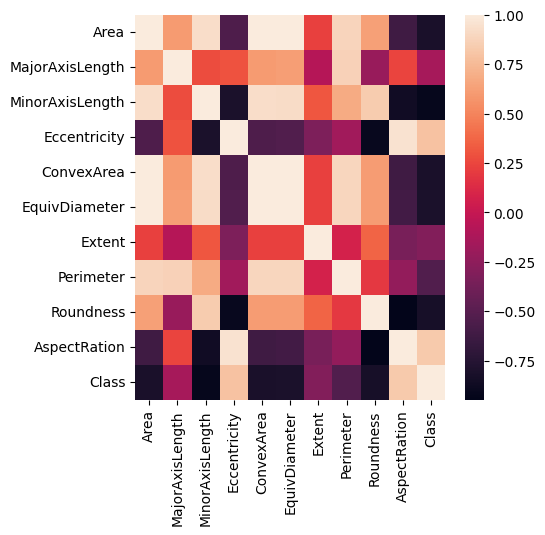

In [25]:
#Menampilkan heatmap korelasi antar kolom
plt.figure(figsize = (5,5))
sns.heatmap(df_eda1.corr())

Berdasarkan visualisasi diatas dapat dilihat korelasi antar data. Jika warna mendekati warna merah, maka korelasinya akan semakin rendah. Kemudian jika warna mendekati warna ungu gelap dan krem, maka korelasinya akan semakin kuat. 

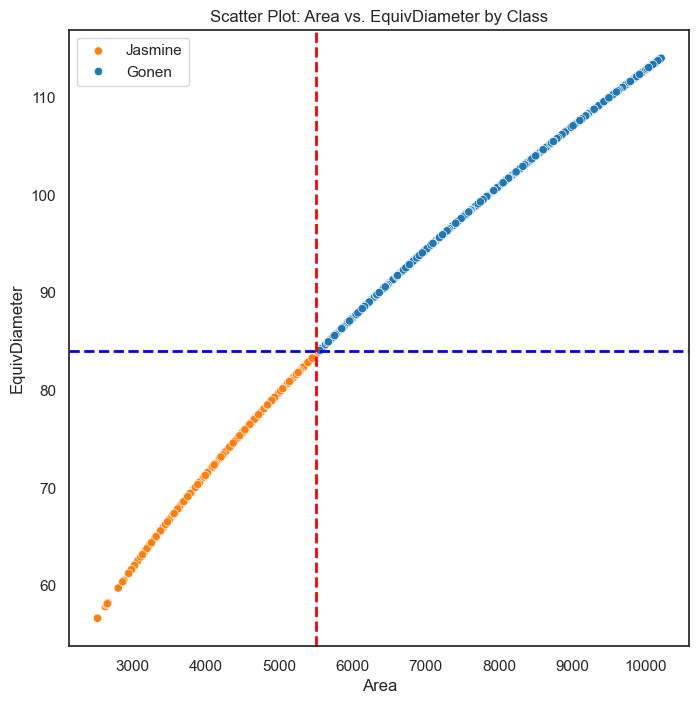

In [26]:
# Membuat grafik scatterplot Area dan EquivDiameter menggunakan class
plt.figure(figsize=(8, 8))
sns.set(style="white")  

# Scatter plot untuk Quality 1
sns.scatterplot(x='Area', y='EquivDiameter', hue='Class', data=df_eda1, palette='tab10')

# Menambahkan garis vertikal pada nilai x
plt.axvline(x=5500, color='red', linestyle='--', linewidth=2, label='Area = 5800')

# Menambahkan garis horizontal pada nilai y
plt.axhline(y=84, color='blue', linestyle='--', linewidth=2, label='EquivDiameter = 85')

plt.title('Scatter Plot: Area vs. EquivDiameter by Class')
plt.legend(labels=['Jasmine', 'Gonen'], loc='upper left')
plt.show()

Berdasarkan visualisasi diatas dapat dilihat hubungan linear antara Area dan EquivDiameter. Semakin tinggi nilai Area dan EquivDiameter maka butir beras tergolong beras Gonen, sedangkan semakin rendah nilai Area dan EquivDiameter maka butir beras tergolong beras Jasmine.

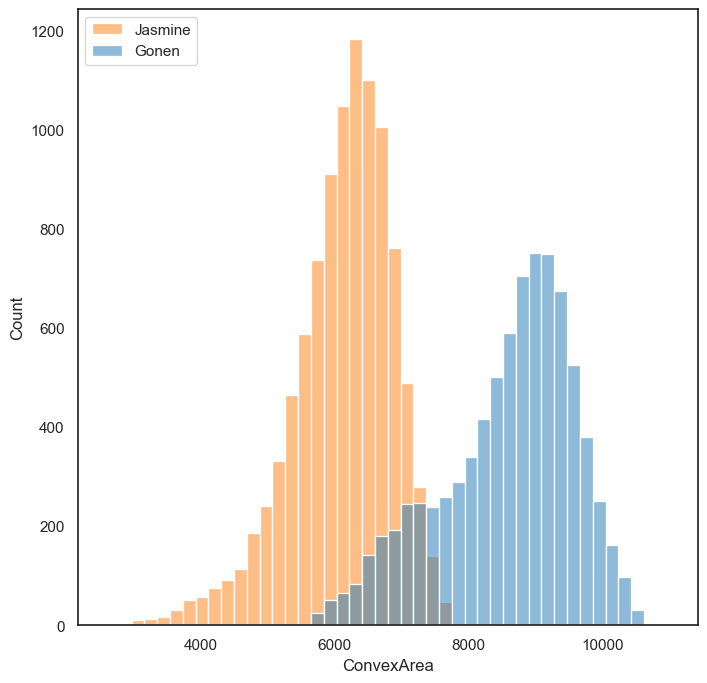

In [27]:
# Membuat histogram ConvexArea berdasarkan Class
plt.figure(figsize=(8, 8))
sns.set(style="white")  

sns.histplot(x='ConvexArea', hue='Class', data=df_eda1, palette='tab10')
plt.legend(labels=['Jasmine', 'Gonen'], loc='upper left')

Berdasarkan visualisasi diatas dapat diketahui bahwa beras Jasmine berada pada rentang ConvexArea bernilai 2579 sampai dengan dibawah 8000, sedangkan beras Gonen berada pada rentang ConvexArea bernilai 5600 sampai dengan 11000. Adapun distribusi data beras gonen lebih tersebar dibandingkan dengan distribusi data beras jasmine jika dilihat dari bentuk distrbusi datanya. 

# Feature Engineering

## Data Splitting

Memisahkan data inference menggunakan salah satu sample pada dataset

In [28]:
# Split inference data
df_inf = df.sample(n = 1, random_state = 1)

# Delete inference from data
df.drop(df_inf.index, inplace = True)

# Reset data index
df.reset_index(drop = True, inplace = True)
df_inf.reset_index(drop = True, inplace = True)

# #Drop class untuk prediksi

df_inf = df_inf.drop('Class', axis=1)

# Saving inference to csv
df_inf.to_csv('inference.csv', index=False)

Data dipisahkan antara feature (X) dan target (y), kemudian dipisahkan juga antara data train dan test untuk digunakan di algoritma Macine Learning.

In [29]:
# Splitting X dan y
X = df.drop('Class', axis = 1)
y = df[['Class']]

X.head()

,id,Area,MajorAxisLength,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Extent,Perimeter,Roundness,AspectRation
0,1,4537,92.229316,64.012769,0.719916,4677,76.004525,0.657536,273.085,0.764510,1.440796
1,2,2872,74.691881,51.400454,0.725553,3015,60.471018,0.713009,208.317,0.831658,1.453137
2,3,3048,76.293164,52.043491,0.731211,3132,62.296341,0.759153,210.012,0.868434,1.465950
3,4,3073,77.033628,51.928487,0.738639,3157,62.551300,0.783529,210.657,0.870203,1.483456
4,5,3693,85.124785,56.374021,0.749282,3802,68.571668,0.769375,230.332,0.874743,1.510000


Membagi data x dan y dengan variabel y sebagai target **Quality** dan membuang variabel **Quality** pada variabel x.

In [30]:
# Splitting data train & test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 1)

print(f"X train shape: {X_train.shape}")
print(f"X test shape: {X_test.shape}")
print(f"y train shape: {y_train.shape}")
print(f"y test shape: {y_test.shape}")

X train shape: (14547, 11)
X test shape: (3637, 11)
y train shape: (14547, 1)
y test shape: (3637, 1)


Melakukan split pada variabel X dan y menjadi data train dan test

## Missing Value Handling

Berdasarkan informasi dari EDA tidak ditemukan missing value pada dataset

## Outlier Handling

In [31]:
# Menampilkan skewness

pd.DataFrame({'Skewness X train':X_train.skew()})

,Skewness X train
id,-0.003785
Area,0.192713
MajorAxisLength,-1.427408
MinorAxisLength,0.203162
Eccentricity,-1.083001
ConvexArea,0.199341
EquivDiameter,-0.007072
Extent,0.275851
Perimeter,-0.658385
Roundness,-0.191878


Berdasarkan informasi diatas dapat dilihat bahwa hanya kolom Sweetness, Juiciness, dan Acidity yang memiliki distribusi skew.

In [32]:
# Membuat fungsi untuk melihat outlier pada dataset

def skew_boundary(data, column):
    iqr = data[column].quantile(0.75) - data[column].quantile(0.25)
    low = data[column].quantile(0.25) - (3 * iqr)
    up = data[column].quantile(0.75) + (3 * iqr)
    return low, up

def normal_boundary(data, column):
    low = data[column].mean() - (3 * data[column].std())
    up = data[column].mean() + (3 * data[column].std())
    return low, up

for col in X_train.columns.tolist():
    if abs(X_train[col].skew()) > 0.5:
        low, up = skew_boundary(X_train, col)
    else:
        low, up = normal_boundary(X_train, col)
    print(f"Persentase outlier {col}: {len(X_train[(X_train[col] < low) | (X_train[col] > up)])/len(X_train)*100:.2f}%")

Persentase outlier id: 0.00%
Persentase outlier Area: 0.01%
Persentase outlier MajorAxisLength: 0.69%
Persentase outlier MinorAxisLength: 0.00%
Persentase outlier Eccentricity: 0.15%
Persentase outlier ConvexArea: 0.02%
Persentase outlier EquivDiameter: 0.17%
Persentase outlier Extent: 0.00%
Persentase outlier Perimeter: 0.08%
Persentase outlier Roundness: 0.10%
Persentase outlier AspectRation: 0.01%


Berdasarkan informasi diatas dapat diketahui bahwa outlier pada kolom X_train cukup rendah (dibawah 1%). Oleh karena itu, dalam hal ini tidak dilakukan outlier handling karena outlier dalam data tergolong rendah dibandingkan dengan keseluruhan data pada X_train dan dianggap sebagai outlier natural dalam data. Atau dapat dikatakan bahwa dengan outlier yang tidak disebabkan oleh kesalahan data atau error dan mencerminkan informasi dan keadaan real, maka diputuskan untuk tidak melakukan handling outlier/membiarkan outlier ada dalam data.

## Feature Selection

Pemilihan feature yang dilibatkan dalam algoritma ML dipertimbangkan berdasarkan korelasinya terhadap target, yaitu `Quality`.  
Karena ada variabel kategorikal dan numerikal pada dataset, korelasi dihitung menggunakan phik_correlation. 

In [33]:
df.corr()['Class']

id                -0.808581
Area              -0.816580
MajorAxisLength   -0.147732
MinorAxisLength   -0.917761
Eccentricity       0.788627
ConvexArea        -0.814204
EquivDiameter     -0.809351
Extent            -0.303435
Perimeter         -0.533258
Roundness         -0.831752
AspectRation       0.832555
Class              1.000000
Name: Class, dtype: float64

Berdasarkan 
Untuk program ini, akan dipilih variabel dengan korelasi > 0.7 ([Referensi](https://unihub.mdx.ac.uk/__data/assets/pdf_file/0024/339207/online_cor.pdf)) sehingga diperoleh feature:
- `Area`
- `MinorAxisLength`
- `Eccentricity`
- `ConvexArea`
- `EquivDiameter`
- `Roundness`
- `AspectRation`

In [34]:
# Memilih variabel berdasarkan korelasi dengan target

X_train_selection = X_train[['Area', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Roundness', 'AspectRation']]

X_test_selection = X_test[['Area', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Roundness', 'AspectRation']]

X_train_selection

,Area,MinorAxisLength,Eccentricity,ConvexArea,EquivDiameter,Roundness,AspectRation
9103,6995,53.298699,0.950005,7154,94.373252,0.625263,3.202714
16144,7663,65.949851,0.898271,7878,98.776691,0.758146,2.275610
14380,7508,66.013097,0.891986,7623,97.772606,0.793477,2.212079
16432,8748,70.294615,0.899537,8957,105.538143,0.761713,2.289143
2843,5366,49.913407,0.933757,5491,82.657144,0.672927,2.794017
...,...,...,...,...,...,...,...
10955,5393,44.432038,0.959193,5617,82.864835,0.575747,3.536679
17289,8898,69.930119,0.904378,9155,106.439116,0.728599,2.343387
5192,6693,54.144827,0.940364,6849,92.313554,0.669326,2.939700
12172,8698,72.581012,0.883763,8957,105.236104,0.764523,2.137052


Melakukan variabel berdasarkan feature selection dan dimasukkan ke dalam X_train dan X_test.

## Feature Scaling

In [35]:
# Feature scaling using MinMaxScaler
scaler = MinMaxScaler()

Melakukan scaling menggunakan MinMaxScaler karena masih terdapat outlier di dalam data. Dibiarkannya outlier karena data bersifat natural, bukan kesalahan dari penginputan data. 

## Preprocess

In [36]:
# Menggunakan preprocess untuk dimasukkan ke dalam Pipeline

preprocess = ColumnTransformer(
    transformers = [
        ('num',scaler,X_train_selection.columns)]
)

Membentuk preprocess untuk membantu dalam proses pipeline di dalam Model. Adapun isi di dalam proses adalah scaler pada X_train. 

# Model Definition

Ada 5 algoritma Machine Learning yang digunakan di program ini: K Nearest Neighbors (KNN), dan Support Vector Machine (SVM), Decision Tree,  Random Forest, dan GradienBoostingClassifier.  
Di tahap pendefinisian model, dibuat 5 baseline model dengan hyperparameter default dari masing-masing algoritma (tidak set value apapun untuk hyperparameter manapun).  
Lima model ini nantinya akan melalui metode cross-validation dengan menggunakan metric Accuracy untuk menghasilkan model yang terbaik, dan hyperparameter tuning akan mengoptimalkan model yang terbaik tersebut. Adapun alasan menggunakan metric accuracy karena dataset memiliki label yang seimbang, yang berarti tidak ada kelas yang dominan. Sebelum dilakukan Cross Validation, dilakukan metode Pipeline untuk menentukan rantai transformasi yang diterapkan kepada kumpulan dataset secara berurutan, yang mana akan mempermudah pada bagian model training dan evaluation Machine Learning

### Pipeline

In [37]:
# Model Definition using pipeline

pipe_svc = Pipeline([("preprocess", preprocess), ("clf", SVC())])
pipe_dt = Pipeline([("preprocess", preprocess), ("clf", DecisionTreeClassifier(random_state=1))])
pipe_rf = Pipeline([("preprocess", preprocess), ("clf", RandomForestClassifier(random_state=1))])
pipe_knn = Pipeline([("preprocess", preprocess), ("clf", KNeighborsClassifier())])
pipe_gb = Pipeline([("preprocess", preprocess), ("clf", GradientBoostingClassifier())])

In [39]:
pipe_svc

Pipeline(steps=[('preprocess',
                 ColumnTransformer(transformers=[('num', MinMaxScaler(),
                                                  Index(['Area', 'MinorAxisLength', 'Eccentricity', 'ConvexArea',
       'EquivDiameter', 'Roundness', 'AspectRation'],
      dtype='object'))])),
                ('clf', SVC())])

Membentuk Pipeline dimana terdapat preprocess dan masing-masing model algoritma Machine Learning dan memasukkannya ke dalam model

### Cross Validation

In [25]:
# Membuat StratifiedKFold untuk membantu proses Cross Validation
skfold = StratifiedKFold(n_splits = 5)

In [26]:
# Define Cross Validation for each model
cv_svm_model = cross_val_score(pipe_svc, X_train_selection, y_train, cv = skfold, scoring='accuracy', n_jobs=-1)
cv_dt_model = cross_val_score(pipe_dt, X_train_selection, y_train, cv = skfold, scoring='accuracy', n_jobs=-1)
cv_rf_model = cross_val_score(pipe_rf, X_train_selection, y_train, cv = skfold, scoring='accuracy', n_jobs=-1)
cv_knn_model = cross_val_score(pipe_knn, X_train_selection, y_train, cv = skfold, scoring='accuracy', n_jobs=-1)
cv_gb_model = cross_val_score(pipe_gb, X_train_selection, y_train, cv = skfold, scoring='accuracy', n_jobs=-1)

Membentuk variabel yang mana terdapat fungsi cross validation pada masing-masing model algoritma Machine Learning, yang mana untuk mengecek peforma dari masing-masing model berdasarkan metric Accucary. 

In [27]:
# Finding Best Model based on Cross_Val_Score (mean)
name_model = []
cv_scores=0
for cv,name in zip([cv_svm_model,cv_dt_model,cv_rf_model,cv_knn_model,cv_gb_model],
                   ['SVM_Model','DT_Model','RF_Model','KNN_Model','GB_model']):
  print(name)
  print('Accuracy - All - Cross Validation :', cv)
  print('Accuracy - Mean - Cross Validation :', cv.mean())
  print('Accuracy - std - Cross Validation :', cv.std())
  print('Accuracy - Range of Test Set :', (cv.mean()-cv.std()), '-' , (cv.mean()+cv.std()))
  print('-'*50)
  if cv.mean() > cv_scores:
    cv_scores = cv.mean()
    name_model = name
  else:
    pass
print('Best Model:', name_model)
print('Cross Val Mean from Best Model:', cv_scores)

SVM_Model
Accuracy - All - Cross Validation : [0.99003436 0.99072165 0.98899966 0.98934342 0.98831213]
Accuracy - Mean - Cross Validation : 0.9894822443441906
Accuracy - std - Cross Validation : 0.0008321396845214356
Accuracy - Range of Test Set : 0.9886501046596692 - 0.9903143840287121
--------------------------------------------------
DT_Model
Accuracy - All - Cross Validation : [0.98178694 0.9862543  0.98143692 0.98281196 0.98418701]
Accuracy - Mean - Cross Validation : 0.9832954251469843
Accuracy - std - Cross Validation : 0.0017614272778966843
Accuracy - Range of Test Set : 0.9815339978690877 - 0.985056852424881
--------------------------------------------------
RF_Model
Accuracy - All - Cross Validation : [0.99072165 0.99037801 0.98831213 0.98899966 0.98762461]
Accuracy - Mean - Cross Validation : 0.9892072121240043
Accuracy - std - Cross Validation : 0.0011843262170072393
Accuracy - Range of Test Set : 0.988022885906997 - 0.9903915383410116
--------------------------------------

Membuat fungsi yang berisikan tentang proses train - test model Machine Learning yang mana outputnya untuk mengeluarkan metric Accuracy untuk mengukur performa. Adapun di dalam fungsinya mengeluarkan model yang terbaik yang berasal dari proses metric.

Berdasarkan informasi diatas didapatkan model yang terbaik adalah menggunakan SVM Model, dengan output metric Accuracy sebesar 0.98. Oleh karena itu best model dalam program ini menggunakan SVM Model. 

# Model Training

Dalam tahapan ini melakukan fitting kepada 3 model algoritma SVM, seperti SVM Baseline, SVM dengan Random Search, dan SVM dengan Grid Search.

## Predict menggunakan best model (Menggunakan SVM)

In [28]:
# SVM Model

pipe_svc.fit(X_train_selection, y_train)

# Memprediksi dengan SVM baseline
y_pred_train_svm = pipe_svc.predict(X_train_selection)
y_pred_test_svm = pipe_svc.predict(X_test_selection)


Melakukan predict menggunakan SVM sebagai best model.

## Hyperparameter Tuning

### Menggunakan SVM dan Random Search

In [29]:
# Model SVM dan Random Search

random_search_params = {
    'clf__C'        : (0.1, 1, 10),
    'clf__kernel'   : ['linear', 'poly','rbf', 'sigmoid'], 
    'clf__gamma'    : ['scale', 'auto']
}

svm_randomcv = RandomizedSearchCV(estimator=pipe_svc,
                                 param_distributions=random_search_params,
                                 n_iter=50,
                                 cv=5,
                                 random_state=1,
                                 n_jobs=-1,
                                 scoring='accuracy')

# Train with Random Search
svm_randomcv.fit(X_train_selection, y_train)

# Get Best Hyperparameters

svm_randomcv.best_params_

{'clf__kernel': 'poly', 'clf__gamma': 'scale', 'clf__C': 10}

Melakukan predict menggunakan Hyperparameter Tuning Random Search dengan model SVM. Adapun paramater yang dituning adalah C, kernel, dan gamma. 

In [30]:
# Get Best Estimator

svm_randomcv_best = svm_randomcv.best_estimator_

#### Menggunakan SVM dan Grid Search

In [31]:
# Model SVM dan Grid Search

grid_search_params = {

    'clf__C' : [
        svm_randomcv.best_params_['clf__C'],
        svm_randomcv.best_params_['clf__C'] + 1,
        svm_randomcv.best_params_['clf__C'] + 2,
        svm_randomcv.best_params_['clf__C'] + 3,
        svm_randomcv.best_params_['clf__C'] + 4,
        svm_randomcv.best_params_['clf__C'] + 5,
        svm_randomcv.best_params_['clf__C'] + 6,
        svm_randomcv.best_params_['clf__C'] + 7,
        svm_randomcv.best_params_['clf__C'] + 8,
        svm_randomcv.best_params_['clf__C'] + 9,
        svm_randomcv.best_params_['clf__C'] + 10,],
    'clf__kernel' : [
        svm_randomcv.best_params_['clf__kernel']],    
    'clf__gamma' : [
        svm_randomcv.best_params_['clf__gamma']]    
}

svm_gridcv = GridSearchCV(estimator=pipe_svc,
                         param_grid=grid_search_params,
                         cv=5,
                         n_jobs=-1,
                         verbose=2,
                         scoring='accuracy')

# Train menggunakan Grid Search

svm_gridcv.fit(X_train_selection, y_train)

# Get Best Hyperparameters

svm_gridcv.best_params_

Fitting 5 folds for each of 11 candidates, totalling 55 fits


{'clf__C': 16, 'clf__gamma': 'scale', 'clf__kernel': 'poly'}

Melakukan predict menggunakan Hyperparameter Tuning Grid Search dengan model SVM. Adapun paramater yang dituning adalah C, kernel, dan gamma. 

In [32]:
# Get Best Estimator

svm_gridcv_best = svm_gridcv.best_estimator_

# Model Evaluation

Melakukan evaluasi masing-masong model berdasarkan hasil metric evaluasi dan Confusion Matrix Display

## Evaluasi Best Model Berdasarkan Cross Validation

SVM - Baseline

Accuracy:  0.991751443497388 

Classification report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1639
           1       0.99      0.99      0.99      1998

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637
 

Confusion matrix      : 


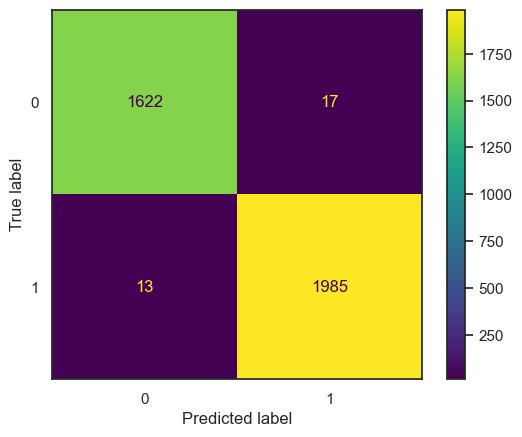

In [33]:
# Menampilkan performa model pada test set
print('SVM - Baseline\n')
print('Accuracy: ', accuracy_score(y_test, y_pred_test_svm), '\n')
print('Classification report : \n', classification_report(y_test, y_pred_test_svm), '\n')
print('Confusion matrix      : \n', ConfusionMatrixDisplay.from_estimator(pipe_svc, X_test_selection, y_test))



Berdasarkan informasi diatas, didapatkan accuracy test dalam model SVM sebesar 0.991. Kemudian jika dilihat dari Confusion Matrix Display, model berhasil memprediksi True Positive sebesar 1985 dan True Negative sebesar 1622. 

In [34]:
# Menyimpan Accuracy model  ke dataframe
report = pd.DataFrame({})
report['SVM (Baseline)'] = {
    'Train - Accuracy':accuracy_score(y_train, y_pred_train_svm),
    'Test - Accuracy':accuracy_score(y_test, y_pred_test_svm),
    }
report

,SVM (Baseline)
Train - Accuracy,0.989551
Test - Accuracy,0.991751


Menyimpan hasil train dan test model SVM baseline di dalam report

## Evaluasi Hyperparameter Tuning Menggunakan SVM dengan Random Search

Accuracy - Test Set   :  0.9928512510310695 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1639
           1       0.99      0.99      0.99      1998

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637
 

Confusion Matrix      : 


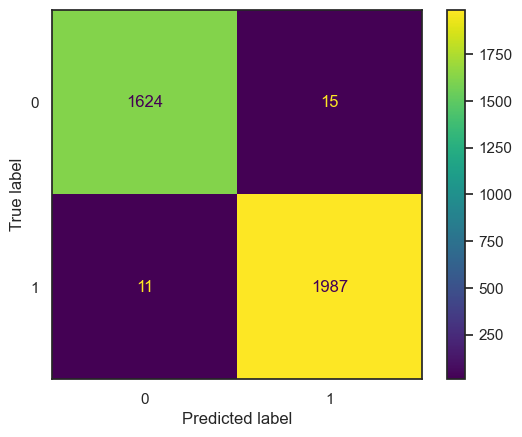

In [35]:
# Check Performance Model against Test-Set

y_pred_train_svm_random = svm_randomcv_best.predict(X_train_selection)
y_pred_test_svm_random = svm_randomcv_best.predict(X_test_selection)

print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test_svm_random), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_svm_random), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_randomcv_best, X_test_selection, y_test))



Berdasarkan informasi diatas, didapatkan accuracy test dalam model SVM menggunakan Hyperpameter Tuning Random Search sebesar 0.992. Kemudian jika dilihat dari Confusion Matrix Display, model berhasil memprediksi True Positive sebesar 1987 dan True Negative sebesar 1624. 

In [36]:
# Menyimpan Accuracy model random-tuned ke dataframe
report['SVM - Random Search'] = {
    'Train - Accuracy':accuracy_score(y_train, y_pred_train_svm_random),
    'Test - Accuracy':accuracy_score(y_test, y_pred_test_svm_random),
    }
report

,SVM (Baseline),SVM - Random Search
Train - Accuracy,0.989551,0.990307
Test - Accuracy,0.991751,0.992851


Menyimpan hasil train dan test model SVM menggunakan Hyperpameter Tuning Random Search di dalam report

## Evaluasi Hyperparameter Tuning Menggunakan SVM dengan Grid Search

Accuracy - Test Set   :  0.9928512510310695 

Classification Report : 
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1639
           1       0.99      0.99      0.99      1998

    accuracy                           0.99      3637
   macro avg       0.99      0.99      0.99      3637
weighted avg       0.99      0.99      0.99      3637
 

Confusion Matrix      : 


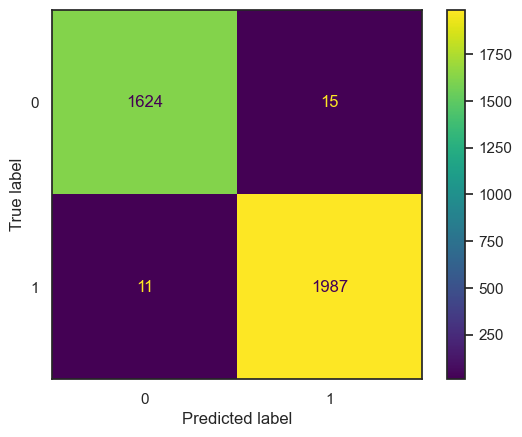

In [37]:
# Check Performance Model against Test-Set

y_pred_train_svm_grid = svm_gridcv_best.predict(X_train_selection)
y_pred_test_svm_grid = svm_gridcv_best.predict(X_test_selection)


print('Accuracy - Test Set   : ', accuracy_score(y_test, y_pred_test_svm_grid), '\n')
print('Classification Report : \n', classification_report(y_test, y_pred_test_svm_grid), '\n')
print('Confusion Matrix      : \n', ConfusionMatrixDisplay.from_estimator(svm_gridcv_best, X_test_selection, y_test))


Berdasarkan informasi diatas, didapatkan accuracy test dalam model SVM menggunakan Hyperpameter Tuning Grid Search sebesar 0.992. Kemudian jika dilihat dari Confusion Matrix Display, model berhasil memprediksi True Positive sebesar 1987 dan True Negative sebesar 1624. 

In [38]:
# Menyimpan Accuracy model grid-tuned ke dataframe
report['SVM - Grid Search'] = {
    'Train - Accuracy':accuracy_score(y_train, y_pred_train_svm_grid),
    'Test - Accuracy':accuracy_score(y_test, y_pred_test_svm_grid),
    }
report

,SVM (Baseline),SVM - Random Search,SVM - Grid Search
Train - Accuracy,0.989551,0.990307,0.990514
Test - Accuracy,0.991751,0.992851,0.992851


Menyimpan hasil train dan test model SVM menggunakan Hyperpameter Tuning Grid Search di dalam report

# Model Saving

In [39]:
# Menyimpan model menjadi file
with open('model.pkl', 'wb') as file_1: 
  pickle.dump(svm_gridcv, file_1)


# Conceptual Problem

1. Bagging dan Cara Kerjanya:

Latar Belakang: Bagging (Bootstrap Aggregating) digunakan untuk meningkatkan kinerja model dengan mengurangi varians. Varians dapat muncul ketika model sangat kompleks dan overfitting terhadap data pelatihan. Bagging bertujuan untuk mengurangi varians ini dan meningkatkan kestabilan model.

Cara Kerja: Bagging bekerja dengan membuat beberapa subset acak dari data pelatihan dengan pengambilan sampel menggunakan penggantian (bootstrap). Kemudian, model dilatih pada setiap subset ini secara independen. Prediksi akhir dihasilkan dengan menggabungkan hasil prediksi dari setiap model (misalnya, melalui voting atau averaging). Dengan demikian, bagging membantu mengurangi varians dan overfitting.

2. Perbedaan Cara Kerja Random Forest dan GradientBoosting Classifier:

Random Forest: Membangun sejumlah besar decision tree secara paralel dan secara acak menggunakan subset dari fitur dan data pelatihan. Prediksi akhir diambil melalui voting (klasifikasi) atau averaging (regresi) dari semua decision tree.

Gradient Boosting Classifier: Membangun decision tree secara berurutan. Setiap tree dibangun untuk memperbaiki kesalahan prediksi model sebelumnya. Proses ini dilakukan dengan memberikan bobot yang lebih tinggi pada data yang tidak terduga dengan baik oleh model sebelumnya. Prediksi akhir dihasilkan dengan menggabungkan prediksi dari setiap tree.

3. Cross Validation:

Definisi: Cross Validation (CV) adalah suatu metode evaluasi kinerja model yang melibatkan pembagian dataset menjadi subset pelatihan dan validasi secara bergantian.

# Overall Analysis

Secara keseluruhan, program dijalankan dengan langkah-langkah sebagai berikut:
1. Mengambil data [RiceTypeClassification](https://www.kaggle.com/datasets/mssmartypants/rice-type-classification/data) dari Kaggle dataset
2. Load data ke dalam dataframe `df` untuk eksplorasi dan pre-processing
3. Import library yang dibutuhkan untuk dapat menjalankan keseluruhan program, termasuk proses pre-processing, FE, dan modelling
4. Eksplorasi data/EDA untuk memahami data secara keseluruhan (variabel yang terlibat pada dataset, hubungan antar variabel, visualisasi, dan lainnya)
5. Feature Engineering (FE), untuk menentukan data train dan data test, pre-processing data agar siap menjadi input untuk model ML, dan memilih fitur dan target yang dilibatkan dalam model
6. Modelling, yang mencakup mendefinisikan 5 baseline model, memilih model terbaik dengan membandingkan Accuracy dari cross-validation dengan dibantu menggunakan Pipeline, lalu mengoptimalkan dengan hyperparameter tuning. Dari proses ini, didapatkan model terbaik untuk mengklasifikasi default credit card adalah SVM dengan C = 16, kernel = poly, dan gamma = scale, fitur 'Area', 'MinorAxisLength', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Roundness', 'AspectRation', dan menghasilkan Accuracy 99,2%.
7. Prediksi dengan data inferens dan berhasil melakukan data prediksi.  
  
Program berjalan dengan baik tanpa error.

Beberapa hal yang dapat diambil atau diperhatikan dari eksplorasi data:

- Data Class sebagai target merupakan data yang seimbang, dimana persentase Jasmine sebesar 54.9% dan Gonen sebesar 45.1%
- Diketahui bahwa hanya kolom MajorAxisLength dan Perimeter yang terdistribusi normal. Kemudian pada kolom Area, MinorAxisLength, Eccentricity, Convex Area, EquivDiamater, Roundness, dan AspectRation yang memiliki 2 peak di dalam distribusi datanya, sehingga dapat dikatakan terdapat 2 modus data, walaupun tidak sama jumlahnya, di dalam kolom-kolom tersebut. Terakhir pada kolom Extent diketahui bahwa terdapat 3 peak di dalam distribusinya sehingga terdapat 3 modus di kolom Extent, walaupun besarannya tidak sama.
-  Berdasarkan visualisasi boxplot dapat diketahui bahwa terdapat outlier di dalam kolom-kolom, baik di batas bawah maupun batas atas. Adapun kolom-kolom yang terlihat outliernya seperti MajorAxisLength, Eccentricity, EquivDiamater, Perimeter, Roundness. Namun perlu diketahui lebih lanjut apakah outlier tersebut merupakan kesalahan dalam penginputan data atau memang natural di dalam data.
-  Berdasarkan visualisasi heatmap correlation dapat diketahui bahwa, jika warna mendekati warna merah, maka korelasinya akan semakin rendah. Kemudian jika warna mendekati warna ungu gelap dan krem, maka korelasinya akan semakin kuat. 
- Terdapat hubungan linear antara Area dan EquivDiameter. Kemudian dari hasil scatterplot, diketahui bahwa semakin tinggi nilai Area dan EquivDiameter maka butir beras tergolong beras Gonen, sedangkan semakin rendah nilai Area dan EquivDiameter maka butir beras tergolong beras Jasmine.
- Berdasarkan visualisasi histogram ConvexArea dengan Class, dapat diketahui bahwa beras Jasmine berada pada rentang ConvexArea bernilai 2579 sampai dengan dibawah 8000, sedangkan beras Gonen berada pada rentang ConvexArea bernilai 5600 sampai dengan 11000. Adapun distribusi data beras gonen lebih tersebar dibandingkan dengan distribusi data beras jasmine jika dilihat dari bentuk distrbusi datanya. 

Dari proses modelling, ada temuan yang perlu di-highlight:
- Model yang terpilih adalah SVM, di mana kelebihannya adalah SVM dapat melakukan handling fitur dalam jumlah yang banyak. Namun, kelemahannya pada model SVM adalah sensitif dengan outlier dan di model ini tidak di-handle outlier karena bersifat natural.
- Cross-validation mengeluarkan SVM sebagai algoritma terbaik untuk memodelkan data. Namun, perbedaan dari Accuracy kelima model tidak terlalu jauh berbeda atau signifikan.
- Hyperparameter tuning terbukti mampu mengoptimalkan performa model, dan di program ini ada sedikit kenaikan performa sekitar 0.01%.
- Model SVM dengan Grid Search mendapatkan hasil yang lebih baik pada train dan test dalam model jika dibandingkan dengan SVM baseline dan SVM dengan Random Search.
- Accuracy model sudah cukup baik dalam melakukan prediksi klasifikasi atau fit, yang dapat dilihat dari hasil accuracy train dan test diatas 90% dan perbedaan train dan test tidak terlalu beda jauh. 
  
Saran untuk improve model:
- Dapat melakukan uji coba handling outlier pada data jika diperlukan untuk mendapatkan hasil accuracy test yang lebih baik.
- Melakukan penambahan atau pengurangan fitur pada Feature Engineering.
- Dapat melakukan eksplorasi lain menggunakan model lainnya seperti Random Forest, KNN, dan lain-lain walaupun SVM sudah memberikan peforma yang baik.

# Kesimpulan

> Kesimpulan secara keseluruhan, terpilih model SVM dengan parameter C = 16, kernel = poly, dan gamma = scale untuk memprediksi beras Jasmine dan Gonen. Accuracy yang diperoleh adalah 99,2%, atau dapat dikatakan model sudah cukup baik dalam memprediksi True Positive dan True Negative dalam dataset.